# Logistic Regression

Logistic regression is a binary classification algorithm i.e. it can classify for only 2 cases eg.
1. True-false
2. Boy-Girl
3. Dead - alive

In [1]:
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv("/home/naman/Desktop/Titanic.csv",delimiter=',',verbose = True)

Tokenization took: 0.80 ms
Type conversion took: 2.89 ms
Parser memory cleanup took: 0.01 ms


This dataset is Titanic's dataset. It contains data of all the passengers like passenger class,gender,age,whether they survived after the boat sank.

We will be using various parameters to decide whether a person survives or not after the boat sank!


In [3]:
data = dataset[["Sex","Age","Pclass","Survived"]] #Only columns needed
data = data.dropna()   #dropping rows with missing values

In [5]:
#splitting into training and test data
train = data.sample(frac=0.8,random_state=200)
test = data.drop(train.index)

#bias column
train = train.assign(bias = np.ones(train.shape[0]))

# Taking the outputs into array named label
label = train['Survived']
train = train.drop("Survived",axis = 1)


Let's explore the data a bit.
The ratio of yes-no decides imbalence of a class. If the data is skewed we need weighted classes!

In [114]:
%matplotlib notebook
import matplotlib.pyplot as plt
def makebarplot(data,cols):
    addtn = len(cols)%3
    if addtn > 0:
        addtn = 1
    sub1 = len(cols)//3 + addtn 
    sub2 = 3
    fig = plt.figure()
    for index,i in enumerate(cols):
        item = data[i].unique()
        X = np.array(range(len(item)))
        Y = [data.groupby(i)[i].count()[j] for j in item]
        ax = fig.add_subplot(sub1,sub2,index+1)
        ax.bar(X,Y,align = 'center')
        plt.setp(ax,xticks=X, xticklabels=item,xlabel = i)

In [75]:
#Logistic regression deals with only numerical data. Converting categorical data gender into nuerical
one_hot = pd.get_dummies(train['Sex'])
train = train.drop('Sex', axis=1)
train = train.join(one_hot)

<IPython.core.display.Javascript object>


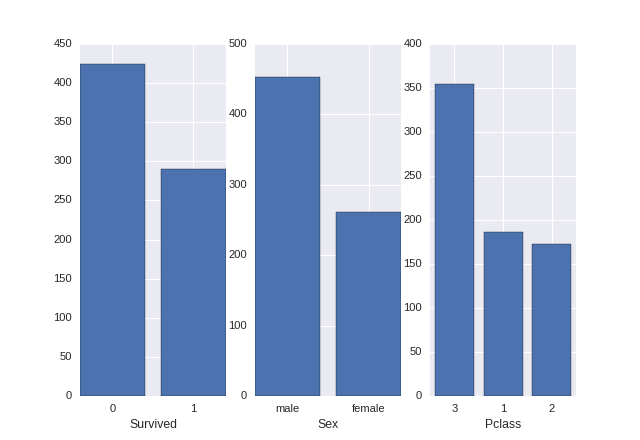

In [180]:
makebarplot(data,["Survived","Sex",'Pclass'])

In [163]:
def makestackedplot(data,cols,target,noofcolsplot = 3):
    addtn = len(cols)%3
    if addtn > 0:
        addtn = 1
    sub1 = len(cols)//3 + addtn 
    sub2 = 3
    fig = plt.figure()
    for index,i in enumerate(cols):
        item = data[i].unique()
        X = np.array(range(len(item)))
        classes = data[target].unique()
        Y = np.zeros((classes.shape[0],item.shape[0]))
        
        for ind,targetlabel in enumerate(classes):
            Y[ind] = [(data[(data[i] == value) & (data[target] == targetlabel)]).shape[0] for value in item]
        
        ax = fig.add_subplot(sub1,sub2,index+1)
        ax.bar(X,Y[0,:],color = 'r',align = 'center')
        ax.bar(X,Y[1,:],color = 'b',bottom = Y[0,:],align = 'center')
        plt.setp(ax,xticks=X, xticklabels=item,xlabel = i)

<IPython.core.display.Javascript object>


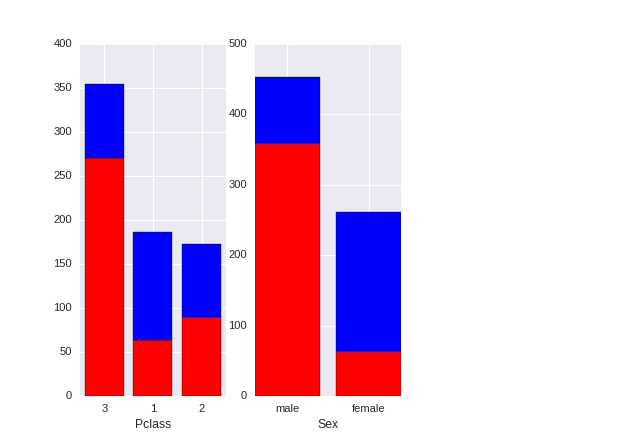

In [178]:
makestackedplot(data,["Pclass","Sex"],"Survived",3)

Logistic regression can be derived similarly to Linear regression. The difference comes in the output. In linear regression the output is $y = m*x + c$ but in logistic regression, the output is $y = sigmoid(m*x + c)$

Here, sigmoid is a mathematical function
$$sigmoid(x) = \frac{1}{1+e^{-\lambda x}}$$
It squeezes the input into range of [0,1]

In [167]:
#sigmoid function
def matmul(m,x):
    return np.dot(x,m)
def sigmoid(x,lmbda = 1):
    return 1/(1+np.exp(-lmbda*x))
#other necessary functions
def sse(y,y_pred): 
    return ((y-y_pred)**2).sum(axis = 1)
def loss(y,m,x): 
    return sse(y, sigmoid(lin(m,x)))

def avg_loss(y,m,x): 
    return np.sqrt(loss(y,m,x)/x.shape[0])

In [171]:
x = train
y = label
hm = np.ones(x.shape[1])

def upd(x,hm,lr = 0.01):
    
    y_pred = sigmoid(matmul(hm,x))
    error = y - y_pred                                          
    #dydm = x*dydc                                         
    #hm -= lr*dydm.mean()
    hm = hm + lr*(x.T*error).mean(axis = 1)
    return hm

In [172]:
for i in range(2000):
    hm = upd(x,hm)
probs = sigmoid(matmul(hm, x))


<IPython.core.display.Javascript object>


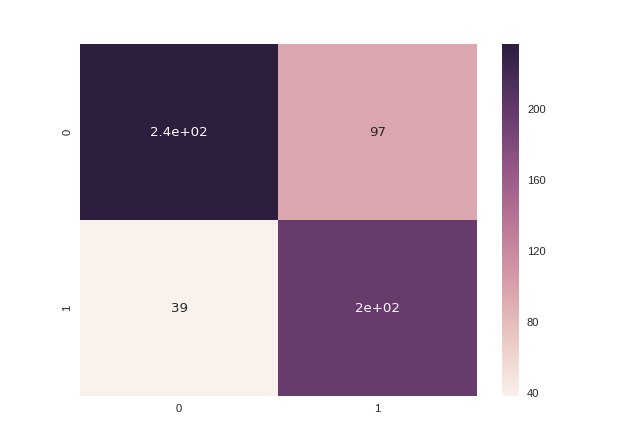

In [179]:
%matplotlib notebook
tempprob = probs[:]
tempprob[tempprob > 0.3] = 1
tempprob[tempprob <= 0.3] = 0
from sklearn.metrics import confusion_matrix
import seaborn as sn

cnf_matrix = confusion_matrix(y, tempprob)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
sn.heatmap(cnf_matrix,annot = True)
plt.show()

Logistic regression for 2000 iterations provides a good accuracy model. As the classes were imbalenced. Instead of threashold of 0.5, I chose threshold of 0.3